In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.animation as animation


In [7]:
L=100

# D=0.1

In [129]:
i_rev_list=[]
for i in range(100):
    try:
        mag=pd.read_csv('destab_film_D0.1_v2/i%d/f_mag.dat'%(i), sep=' ', names=['t', 'M'])
        i_rev_list.append(i)
    except:
        pass

In [130]:
list_td=[]
for i in i_rev_list:
    mag=pd.read_csv('destab_film_D0.1_v2/i%d/f_mag.dat'%(i), sep=' ', names=['t', 'M'])
    list_td.append(mag.t[np.where(mag.M<0.9)[0][0]])

In [131]:
len(list_td)

53

In [132]:
np.mean(list_td)

6211713.262469132

In [214]:
L=100

In [215]:
i=29
df_m=pd.read_csv('destab_film_D0.1_v2/i%d/f_profiles_m.dat'%(i), sep=' ', names=['t']+[str(a) for a in np.arange(L)], index_col=False, dtype=np.float64)
mag=pd.read_csv('destab_film_D0.1_v2/i%d/f_mag.dat'%(i), sep=' ', names=['t', 'M'])


(628200.045276, 638200.045276)

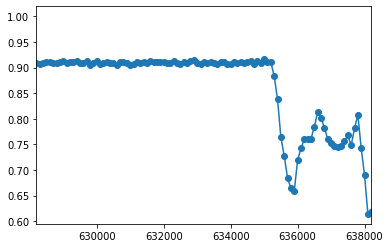

In [216]:
plt.plot(mag.t, mag.M, 'o-')
plt.xlim(mag.t.values[-1]-10000, mag.t.values[-1])

(80, 90)

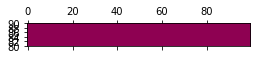

In [251]:
kt=692
t0=np.unique(df_m.t)[kt]
v0=10
X_m=df_m[df_m.t==t0].drop(columns=['t']).values<-30
#print(t0, np.sum(X_m.values)/(5*100*100))
img=plt.matshow(X_m, cmap='PiYG')#, vmin=-v0, vmax=v0)

# cbar = plt.colorbar(img)
# cbar.set_label('Magnetization')

#plt.xlim(50,70)
plt.ylim(80,90)

In [224]:
min_mag=[]
for t0 in np.unique(df_m.t):
    min_mag.append(np.min(df_m[df_m.t==t0].drop(columns=['t']).values))

ValueError: zero-size array to reduction operation minimum which has no identity

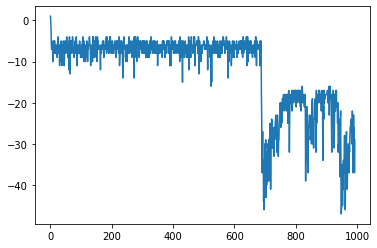

In [225]:
plt.plot(min_mag)

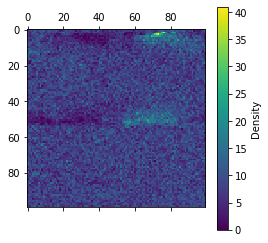

In [69]:
kt=50
t0=np.unique(df_m.t)[kt]
X_rho=df_rho[df_rho.t==t0].drop(columns=['t'])
plt.matshow(X_rho)

cbar = plt.colorbar()
cbar.set_label('Density')


In [215]:
1/1.2

0.8333333333333334

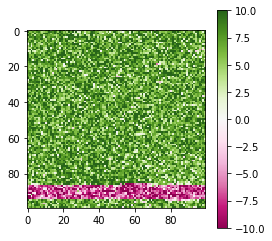

In [199]:

fig, ax = plt.subplots(figsize=(4, 4))

v0=10

kt=600
t0=np.unique(df_m.t)[kt]

X_m=df_m[df_m.t==t0].drop(columns=['t'])

im = plt.imshow(X_m, cmap='PiYG', vmin=-v0, vmax=v0)
plt.colorbar()

def update(*args):
    global kt

    t0=np.unique(df_m.t)[kt]
    X_m=df_m[df_m.t==t0].drop(columns=['t'])
    
    im.set_array(X_m)

    kt += 1

    return im,

ani = animation.FuncAnimation(fig, update, 200)
writer = animation.ImageMagickFileWriter(fps=20)
ani.save('rev3.gif', writer=writer) 

In [227]:
mag=pd.read_csv('../1box/destab_D0.1/i%d/f_mag.dat'%(0), sep=' ', names=['t', 'M'])

(25930000.0, 25970000.0)

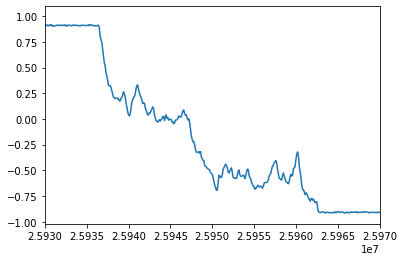

In [232]:
plt.plot(mag.t, mag.M)
plt.xlim(2.593e7,2.597e7)

# D=0.11

In [8]:
i_rev_list=[]
for i in range(100):
    try:
        mag=pd.read_csv('destab_film_D0.11/i%d/f_mag.dat'%(i), sep=' ', names=['t', 'M'])
        i_rev_list.append(i)
    except:
        pass

In [9]:
list_td=[]
for i in i_rev_list:
    mag=pd.read_csv('destab_film_D0.11/i%d/f_mag.dat'%(i), sep=' ', names=['t', 'M'])
    list_td.append(mag.t[np.where(mag.M<0.9)[0][0]])

In [10]:
i_rev_list

[6, 7, 8, 11, 17, 22, 24]

In [11]:
np.mean(list_td)

9019942.920208002

In [12]:
i=8
df_m=pd.read_csv('destab_film_D0.11/i%d/f_profiles_m.dat'%(i), sep=' ', names=['t']+[str(a) for a in np.arange(L)], index_col=False, dtype=np.float64)
mag=pd.read_csv('destab_film_D0.11/i%d/f_mag.dat'%(i), sep=' ', names=['t', 'M'])


(265300.09695, 275300.09695)

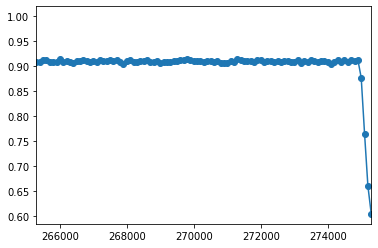

In [13]:
plt.plot(mag.t, mag.M, 'o-')
plt.xlim(mag.t.values[-1]-10000, mag.t.values[-1])

274970.05 1.4426


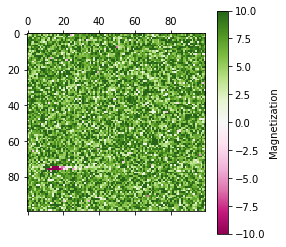

In [35]:
kt=967
t0=np.unique(df_m.t)[kt]
v0=10
X_m=df_m[df_m.t==t0].drop(columns=['t'])
print(t0, np.sum(X_m.values)/(5*100*100))
img=plt.matshow(X_m, cmap='PiYG', vmin=-v0, vmax=v0)

cbar = plt.colorbar(img)
cbar.set_label('Magnetization')


In [36]:
np.min(X_m.values)

-41.0

# Large L

In [137]:
L=10000

In [139]:
df_m=pd.read_parquet('destab_film_D0.1_largeL/i1/f_profiles_m.parquet')


In [5]:
mag=pd.read_csv('destab_film_D0.1_largeL/i1/f_mag.dat', sep=' ', names=['t', 'M'])


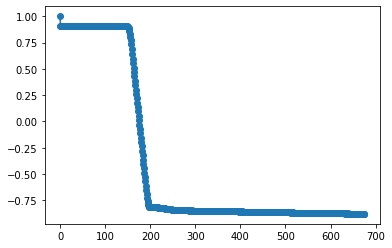

In [7]:
plt.plot(mag.M, 'o-')
#plt.xlim(mag.t.values[-1]-10000, mag.t.values[-1])

-56.0

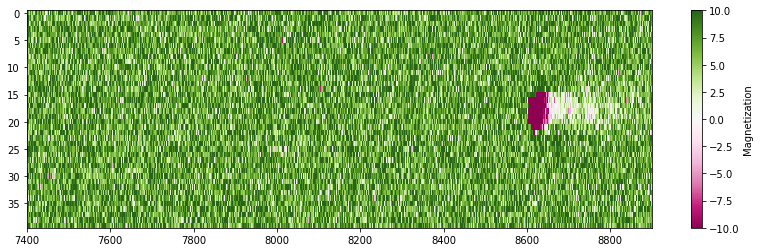

In [208]:
fig, ax = plt.subplots(figsize=(14, 4))

kt=1490
t0=np.unique(df_m.t)[kt]
v0=10
X_m=np.roll(df_m[df_m.t==t0].drop(columns=['t']), axis=0, shift=10)
img=plt.imshow(X_m, cmap='PiYG', vmin=-v0, vmax=v0, aspect="auto")

plt.xlim(7400,8900)
cbar = plt.colorbar(img)
cbar.set_label('Magnetization')
np.min(X_m[X_m<0])

(8400, 8900)

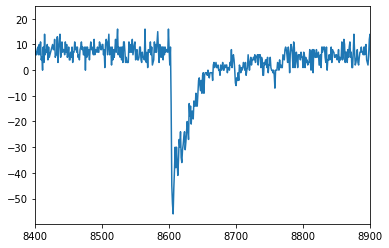

In [206]:
kt=1490
t0=np.unique(df_m.t)[kt]
X_m=np.roll(df_m[df_m.t==t0].drop(columns=['t']), axis=0, shift=10)

plt.plot(X_m[18,:])
plt.xlim(8400,8900)


In [182]:
kt=1450
t0=np.unique(df_m.t)[kt]
v0=10
X_m=np.roll(df_m[df_m.t==t0].drop(columns=['t']), axis=0, shift=10)


In [179]:
hist, bins = np.histogram(X_m, bins=np.arange(-20,25,1), density=True)

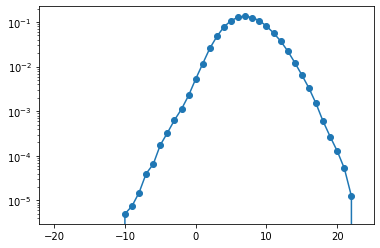

In [185]:
plt.semilogy(bins[:-1], hist, 'o-')

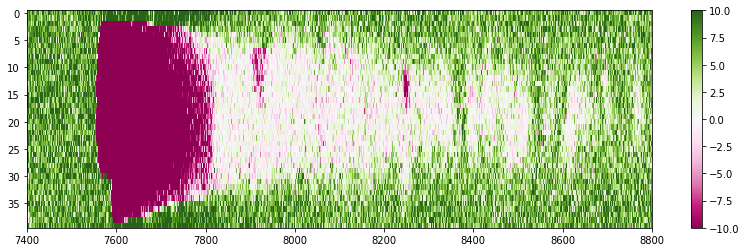

In [60]:

fig, ax = plt.subplots(figsize=(14, 4))

v0=10

kt=1450
t0=np.unique(df_m.t)[kt]

X_m=np.roll(df_m[df_m.t==t0].drop(columns=['t']), axis=0, shift=10)

im = plt.imshow(X_m, cmap='PiYG', vmin=-v0, vmax=v0, aspect="auto")
plt.xlim(7400,8800)

plt.colorbar()

def update(*args):
    global kt

    t0=np.unique(df_m.t)[kt]
    X_m=np.roll(df_m[df_m.t==t0].drop(columns=['t']), axis=0, shift=10)
    
    im.set_array(X_m)

    kt += 1

    return im,

ani = animation.FuncAnimation(fig, update, 120)
writer = animation.ImageMagickFileWriter(fps=20)
ani.save('rev_largeL.mp4', writer=writer) 

# Complete reversal

In [61]:
L=100

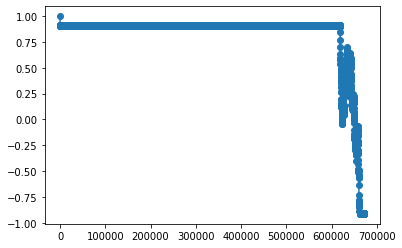

In [96]:
df_m=pd.read_csv('destab_film_D0.1_complete_rev/i0/f_profiles_m.dat', sep=' ', names=['t']+[str(a) for a in np.arange(L)], index_col=False, dtype=np.float64)
mag=pd.read_csv('destab_film_D0.1_complete_rev/i0/f_mag.dat', sep=' ', names=['t', 'M'])
plt.plot(mag.t, mag.M, 'o-')


663030.02


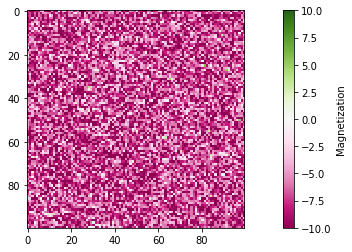

In [110]:
fig, ax = plt.subplots(figsize=(14, 4))

kt=7800
t0=np.unique(df_m.t)[kt]
print(t0)
v0=10
X_m=np.roll(df_m[df_m.t==t0].drop(columns=['t']), axis=0, shift=56)
img=plt.imshow(X_m, cmap='PiYG', vmin=-v0, vmax=v0)#, aspect="auto")

#plt.xlim(7400,8800)
cbar = plt.colorbar(img)
cbar.set_label('Magnetization')


In [106]:
7800-3350

4450

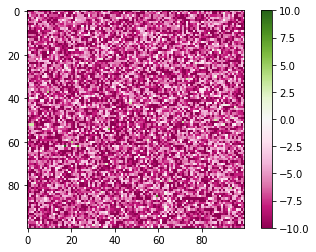

In [128]:
fig, ax = plt.subplots()

v0=10

kt=3350
t0=np.unique(df_m.t)[kt]

X_m=np.roll(df_m[df_m.t==t0].drop(columns=['t']), axis=0, shift=56)
im = plt.imshow(X_m, cmap='PiYG', vmin=-v0, vmax=v0)#, aspect="auto")

plt.colorbar()

def update(*args):
    global kt

    t0=np.unique(df_m.t)[kt]
    X_m=np.roll(df_m[df_m.t==t0].drop(columns=['t']), axis=0, shift=56)
    
    im.set_array(X_m)
    
    kt += 10

    return im,

ani = animation.FuncAnimation(fig, update, 445)
writer = animation.ImageMagickFileWriter(fps=24)
ani.save('rev_complete.mp4', writer=writer) 